In [14]:
#pip install prophet

In [21]:
from prophet import Prophet
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm


In [16]:
df = pd.read_csv('data/BTC-USD_historical_data.csv')

In [17]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-09-21,27129.839844,27152.939453,26389.300781,26567.632812,26567.632812,13371443708
1,2023-09-22,26564.056641,26726.078125,26495.533203,26579.568359,26579.568359,10578746709
2,2023-09-23,26578.556641,26634.185547,26520.519531,26579.390625,26579.390625,7404700301
3,2023-09-24,26579.373047,26716.058594,26221.050781,26256.826172,26256.826172,8192867686
4,2023-09-25,26253.775391,26421.507812,26011.468750,26298.480469,26298.480469,11997833257


In [18]:
df = df[["Date", "Close"]]
df.columns = ["ds", "y"]

In [19]:
px.line(df, x='ds', y='y')

<Figure size 1500x1000 with 0 Axes>

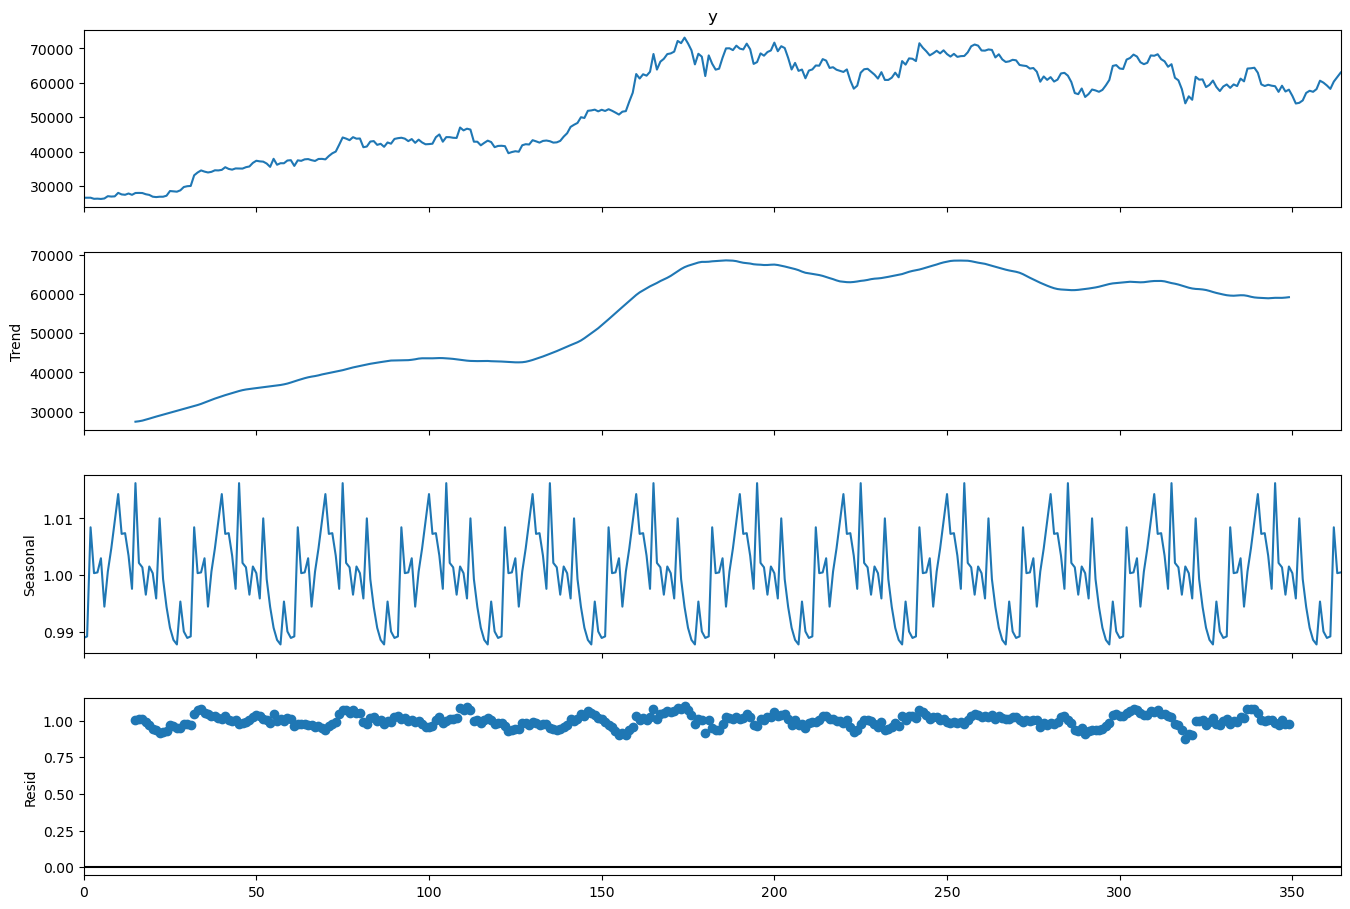

In [22]:
result = seasonal_decompose(df['y'], model='multiplicative', period=30)
plt.figure(figsize=(15, 10))
fig =result.plot()
fig.set_size_inches(15, 10)

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

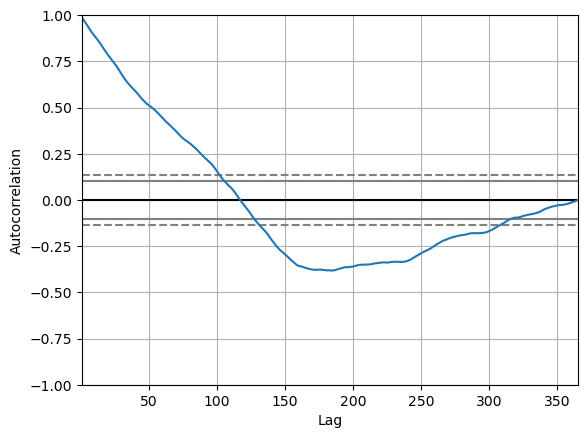

In [23]:
pd.plotting.autocorrelation_plot(df['y'])

In [24]:
model=sm.tsa.statespace.SARIMAX(df['y'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results = model.fit()
results.summary()

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.65293D+00    |proj g|=  7.50724D-02

At iterate    5    f=  8.62710D+00    |proj g|=  1.35420D-02

At iterate   10    f=  8.62604D+00    |proj g|=  2.02930D-03

At iterate   15    f=  8.62599D+00    |proj g|=  8.45227D-04

At iterate   20    f=  8.62534D+00    |proj g|=  1.39343D-02

At iterate   25    f=  8.58783D+00    |proj g|=  1.71530D-01

At iterate   30    f=  8.56211D+00    |proj g|=  5.79912D-03

At iterate   35    f=  8.56182D+00    |proj g|=  9.30399D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  365
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -3125.063
Date:                            Fri, 20 Sep 2024   AIC                           6260.126
Time:                                    11:58:59   BIC                           6279.444
Sample:                                         0   HQIC                          6267.814
                                            - 365                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3898      0.336     -1.159      0.247      -1.049       0.270
ma.L1          0.2817      0.343      0.821      0.412      -0.391       0.955
ar.S.L12       0.1010      0.035      2.925      0.003       0.033       0.169
ma.S.L12      -0.9157      0.038    -24.318      0.000      -0.989      -0.842
sigma2      2.793e+06   1.51e+05     18.473      0.000     2.5e+06    3.09e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):                74.74
Prob(Q):                              0.76   Prob(JB):                         0.00
Heteroskedasticity (H):               1.57   Skew:                            -0.02
Prob(H) (two-sided):                  0.01   Kurtosis:                         5.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [25]:
predictions = results.predict(len(df), len(df)+7)
predictions

365    62460.328726
366    62950.713178
367    62926.799510
368    62992.201674
369    63578.965917
370    64401.704828
371    64443.966695
372    63900.502863
Name: predicted_mean, dtype: float64

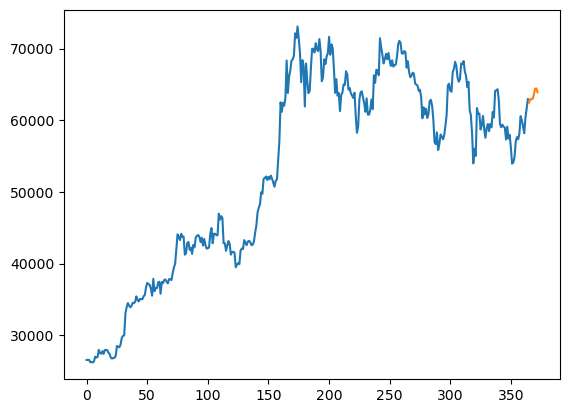

In [27]:
df['y'].plot()
predictions.plot();

In [20]:
from prophet.plot import plot_plotly, plot_components_plotly

model = Prophet()
model.fit(df)
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)
forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail(200)
predictions = model.predict(forecast)
plot_plotly(model, predictions)

11:57:22 - cmdstanpy - INFO - Chain [1] start processing
11:57:22 - cmdstanpy - INFO - Chain [1] done processing
